### Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# Below used during Data cleaning process
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#For Modeling
from sklearn.model_selection import train_test_split

### Loading our Dataset

In [42]:
file_name = 'cars.csv'
df = pd.read_csv(file_name, sep = ';')
df = df.iloc[1: , :]

In [43]:
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


In [22]:
cars_df.head()

,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
0,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
1,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
2,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
3,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US
4,Ford Galaxie 500,15.0,8,429.0,198.0,4341.0,10.0,70,US


### Exploring our Dataset

In [25]:
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


### Question 1

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 1 to 406
Data columns (total 9 columns):
Car             406 non-null object
MPG             406 non-null object
Cylinders       406 non-null object
Displacement    406 non-null object
Horsepower      406 non-null object
Weight          406 non-null object
Acceleration    406 non-null object
Model           406 non-null object
Origin          406 non-null object
dtypes: object(9)
memory usage: 28.7+ KB


In [27]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
#print ("\nMissing values :  ", churn_df.isnull().sum().values.sum()) 
print ("\nUnique values :  \n",df.nunique())

Rows     :  406
Columns  :  9

Features : 
 ['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']

Unique values :  
 Car             308
MPG             130
Cylinders         5
Displacement     83
Horsepower       94
Weight          356
Acceleration     97
Model            13
Origin            3
dtype: int64


### Question 2

In [32]:
# Getting Imputs & Outputs
from sklearn.model_selection import train_test_split

# removing the label values from our training data
X = df.drop(['Origin'], axis=1).values

# assigning those label values to our Y dataset
y = df['Origin'].values
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

[2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 1 0 0 0 0 0 2 2 2 2 2 1 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 0 2 1 2 0 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 0 0 0 0 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 1 2 1 1 2 2 0 2 2 0 0 0 0 2 0 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2
 0 0 0 1 1 2 0 0 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 0 1 2 0 2 0
 0 0 0 1 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 0 1 1 2 0 2 0 1 0 2 2 2
 2 1 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 1 0 1 0 1 0 2 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 1 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 1 2 2 0 2 0 2 2 2 1 0 2 2 2 2 0 1 2 1 2 2 2 2 0 1 1 1 1 1 2 1 0
 0 0 0 1 0 1 0 1 1 0 2 1 2 2 2 2 2 1 2 1 1 1 1 1 2 2 2 0 0 1 1 1 1 0 0 0 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 2 2 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 2 2 2]


In [34]:
df.drop(['Car'], axis=1, inplace=True)
df.head()

KeyError: "['Car'] not found in axis"

In [35]:
# Spliting it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### SVM

In [38]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(y_pred)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[2 0 1 1 2 2 0 2 0 0 2 0 2 1 2 1 2 1 1 2 2 2 2 0 2 1 2 0 2 1 1 2 2 2 2 2 1
 2 0 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 1 2 0 2 0 2 2 2 2 2 0 1 2 2 1
 2 2 2 1 2 0 2 2 0 2 2 2 2 2 1 1 0 0 2 2 2 1 0 2 1 1 2 2 2 2 2 2 2 2 2 2 0
 2 1 2 2 2 2 2 1 2 0 2 2 0 2 2 1 0 1 0 2 2 2 2 2 0 2 2 0 2 2 1 2 0 2 1 2 1
 2 0 0 1 2 2 2 2 2 1 2 2 2 2 0]
Accuracy: 0.7975460122699386


### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train) 
#Predicting the test set result  
y_pred= classifier.predict(X_test) 
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[12  4  7]
 [11 17 10]
 [ 7  5 90]]


### Naive Bayes

In [50]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [51]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.754601226993865


### Data Vizualization

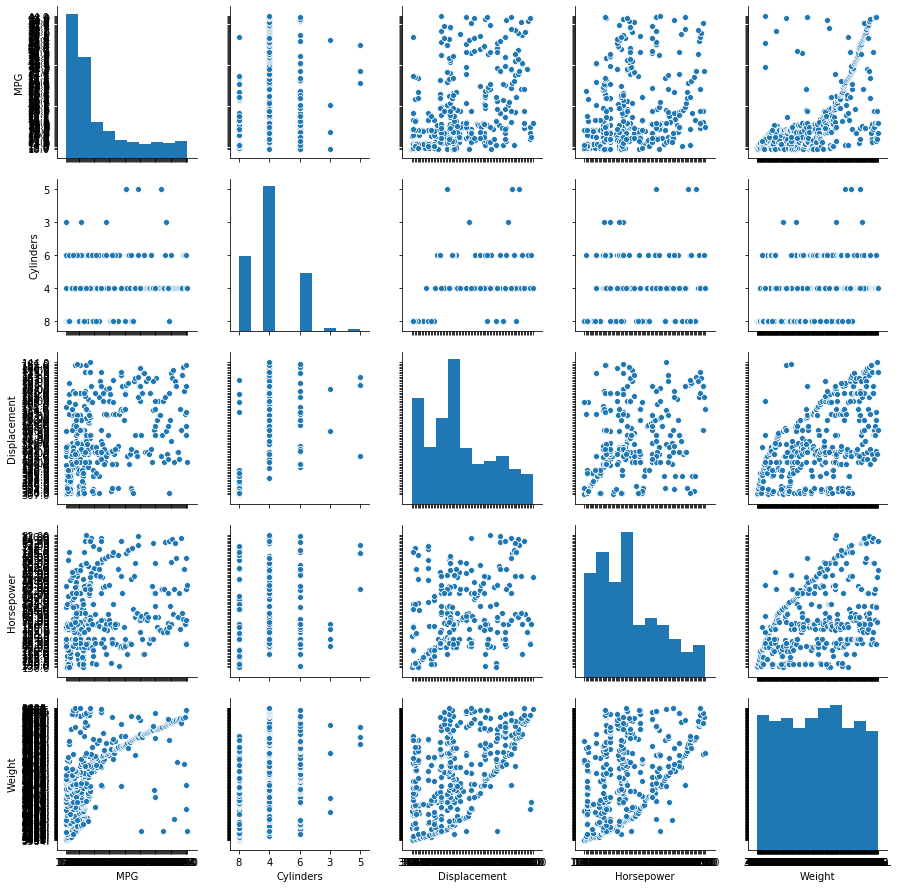

In [44]:
import seaborn as sns
#make pairplots
sns.pairplot(df, vars = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight"], dropna = True)

In [52]:
ax = sns.heatmap(df.corr(), xticklabels=df_corr.columns, yticklabels=df_corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

NameError: name 'df_corr' is not defined